# Á¨¨‰∏ÄÊ≠• ÂØºÂÖ•ÂøÖË¶ÅÂ∫ì‰∏éÂü∫Á°ÄËÆæÁΩÆ

In [17]:
# ÂØºÂÖ•numpyÔºåÁî®‰∫éÊï∞ÁªÑÊìç‰ΩúÂíåÊï∞Â≠¶ËøêÁÆó
import numpy as np
# ÂØºÂÖ•ÁªòÂõæÂ∫ìÔºåÁî®‰∫éÊï∞ÊçÆÂèØËßÜÂåñÂíåÁªìÊûúÂ±ïÁ§∫
import matplotlib.pyplot as plt
# ‰ªéKerasÂØºÂÖ•Â±Ç„ÄÅÊ®°ÂûãÂíåÂ∫îÁî®Ê®°ÂùóÔºåÁî®‰∫éÊûÑÂª∫Ê∑±Â∫¶Â≠¶‰π†Ê®°Âûã
from tensorflow.keras import layers, models, applications
# ÂØºÂÖ•Adam‰ºòÂåñÂô®ÔºåÁî®‰∫éÊ®°ÂûãËÆ≠ÁªÉ
from tensorflow.keras.optimizers import Adam
# ÂØºÂÖ•Â∑•ÂÖ∑ÂáΩÊï∞ÔºåÁî®‰∫éÂ∞ÜÊ†áÁ≠æËΩ¨Êç¢‰∏∫ÂàÜÁ±ªÊ†ºÂºè
from tensorflow.keras.utils import to_categorical
# ÂØºÂÖ•ÂõûË∞ÉÂáΩÊï∞ÔºåÁî®‰∫éÂú®ËÆ≠ÁªÉËøáÁ®ã‰∏≠‰øùÂ≠òÊúÄ‰Ω≥Ê®°ÂûãÂíåÊó©ÂÅú
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# ÂØºÂÖ•ÂõæÂÉèÊï∞ÊçÆÁîüÊàêÂô®ÔºåÁî®‰∫éÊï∞ÊçÆÂ¢ûÂº∫
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ‰ªéscikit-learnÂØºÂÖ•Êï∞ÊçÆÈõÜÂàíÂàÜÂáΩÊï∞
from sklearn.model_selection import train_test_split
# ‰ªéscikit-learnÂØºÂÖ•ÂáÜÁ°ÆÁéáËÆ°ÁÆóÂáΩÊï∞
from sklearn.metrics import accuracy_score
# ÂØºÂÖ•Êìç‰ΩúÁ≥ªÁªüÊé•Âè£ÔºåÁî®‰∫éÊñá‰ª∂Êìç‰Ωú
import os
# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìÂíåÊõ¥Â§ßÁöÑÂ≠ó‰ΩìÂ§ßÂ∞èÔºåÁ°Æ‰øùÂõæË°®‰∏≠ÁöÑ‰∏≠ÊñáÊ≠£Â∏∏ÊòæÁ§∫
plt.rcParams['font.sans-serif'] = ['SimHei']  # ‰ΩøÁî®Èªë‰Ωì
plt.rcParams['axes.unicode_minus'] = False    # Ëß£ÂÜ≥Ë¥üÂè∑ÊòæÁ§∫ÈóÆÈ¢ò
plt.rcParams['font.size'] = 12                # ËÆæÁΩÆÂ≠ó‰ΩìÂ§ßÂ∞è

# Á¨¨‰∫åÊ≠• Êï∞ÊçÆÁöÑÂä†ËΩΩ‰∏éÈ¢ÑÂ§ÑÁêÜ

In [18]:
# ‰ªéKerasÂÜÖÁΩÆÊï∞ÊçÆÈõÜ‰∏≠ÂØºÂÖ•CIFAR10Êï∞ÊçÆÈõÜ
from tensorflow.keras.datasets import cifar10

# Âä†ËΩΩCIFAR10Êï∞ÊçÆÈõÜÔºåËá™Âä®ÂàíÂàÜ‰∏∫ËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
# x_train: 50000Âº†32x32ÁöÑÂΩ©Ëâ≤ËÆ≠ÁªÉÂõæÂÉè
# y_train: 50000‰∏™ËÆ≠ÁªÉÊ†áÁ≠æ
# x_test: 10000Âº†32x32ÁöÑÂΩ©Ëâ≤ÊµãËØïÂõæÂÉè  
# y_test: 10000‰∏™ÊµãËØïÊ†áÁ≠æ
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# ÂÆö‰πâÊï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÂáΩÊï∞
def preprocess_data(x, target_size=(75, 75)):
    """
    È¢ÑÂ§ÑÁêÜÊï∞ÊçÆÔºöÂΩí‰∏ÄÂåñÂπ∂Ë∞ÉÊï¥ÂõæÂÉèÂ∞∫ÂØ∏‰ª•ÈÄÇÂ∫îÈ¢ÑËÆ≠ÁªÉÊ®°Âûã
    
    ÂèÇÊï∞:
    x: ËæìÂÖ•ÂõæÂÉèÊï∞ÁªÑ
    target_size: ÁõÆÊ†áÂõæÂÉèÂ∞∫ÂØ∏ÔºåÈªòËÆ§‰∏∫75x75
    
    ËøîÂõû:
    È¢ÑÂ§ÑÁêÜÂêéÁöÑÂõæÂÉèÊï∞ÁªÑ
    """
    
    # Â∞ÜÂÉèÁ¥†ÂÄº‰ªé0-255Áº©ÊîæÂà∞0-1‰πãÈó¥ÔºåÊèêÈ´òËÆ≠ÁªÉÁ®≥ÂÆöÊÄß
    x = x.astype('float32') / 255.0
    
    # ‰ΩøÁî®TensorFlowÁöÑÂõæÂÉèË∞ÉÊï¥ÂäüËÉΩÂ∞ÜÂõæÂÉè‰ªé32x32‰∏äÈááÊ†∑Âà∞ÁõÆÊ†áÂ∞∫ÂØ∏
    # ÈÄâÊã©75x75‰Ωú‰∏∫Êäò‰∏≠Â∞∫ÂØ∏ÔºåÊó¢‰øùÁïôË∂≥Â§ü‰ø°ÊÅØÂèà‰∏çËøáÂ∫¶Â¢ûÂä†ËÆ°ÁÆóÈáè
    
    import tensorflow as tf
    x_resized = tf.image.resize(x, target_size).numpy()
    return x_resized

# È¢ÑÂ§ÑÁêÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
# Â∞Ü32x32ÂõæÂÉèË∞ÉÊï¥‰∏∫75x75Ôºå‰ª•ÈÄÇÂ∫îÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÁöÑËæìÂÖ•Ë¶ÅÊ±Ç
x_train_processed = preprocess_data(x_train)
x_test_processed = preprocess_data(x_test)

# Â∞ÜÊï¥Êï∞Ê†áÁ≠æËΩ¨Êç¢‰∏∫one-hotÁºñÁ†ÅÊ†ºÂºè
# ‰æãÂ¶ÇÔºöÊ†áÁ≠æ3ËΩ¨Êç¢‰∏∫[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train_categorical = to_categorical(y_train, 10)  # 10‰∏™Á±ªÂà´
y_test_categorical = to_categorical(y_test, 10)    # 10‰∏™Á±ªÂà´

# ‰ªéËÆ≠ÁªÉÈõÜ‰∏≠ÂàíÂàÜÂá∫È™åËØÅÈõÜÔºåÁî®‰∫éÂú®ËÆ≠ÁªÉËøáÁ®ã‰∏≠ÁõëÊéßÊ®°ÂûãÊÄßËÉΩ
# ‰ΩøÁî®80%ÁöÑÊï∞ÊçÆËÆ≠ÁªÉÔºå20%ÁöÑÊï∞ÊçÆÈ™åËØÅ
# random_state=1 Á°Æ‰øùÊØèÊ¨°ÂàíÂàÜÁªìÊûú‰∏ÄËá¥Ôºå‰æø‰∫éÁªìÊûúÂ§çÁé∞
x_train_final, x_val, y_train_final, y_val = train_test_split(
    x_train_processed, y_train_categorical, 
    test_size=0.2, random_state=1
    )

# ÊâìÂç∞ÂêÑÊï∞ÊçÆÈõÜÁöÑÂΩ¢Áä∂ÔºåÁ°ÆËÆ§Êï∞ÊçÆÂ§ÑÁêÜÊ≠£Á°Æ
print(f"ËÆ≠ÁªÉÈõÜÂΩ¢Áä∂: {x_train_final.shape}")  # Â∫îËØ•ÊòØ(40000, 75, 75, 3)
print(f"È™åËØÅÈõÜÂΩ¢Áä∂: {x_val.shape}")          # Â∫îËØ•ÊòØ(10000, 75, 75, 3)  
print(f"ÊµãËØïÈõÜÂΩ¢Áä∂: {x_test_processed.shape}") # Â∫îËØ•ÊòØ(10000, 75, 75, 3)

ËÆ≠ÁªÉÈõÜÂΩ¢Áä∂: (40000, 75, 75, 3)
È™åËØÅÈõÜÂΩ¢Áä∂: (10000, 75, 75, 3)
ÊµãËØïÈõÜÂΩ¢Áä∂: (10000, 75, 75, 3)


# Á¨¨‰∏âÊ≠• ÂèØËßÜÂåñÊï∞ÊçÆÈõÜ

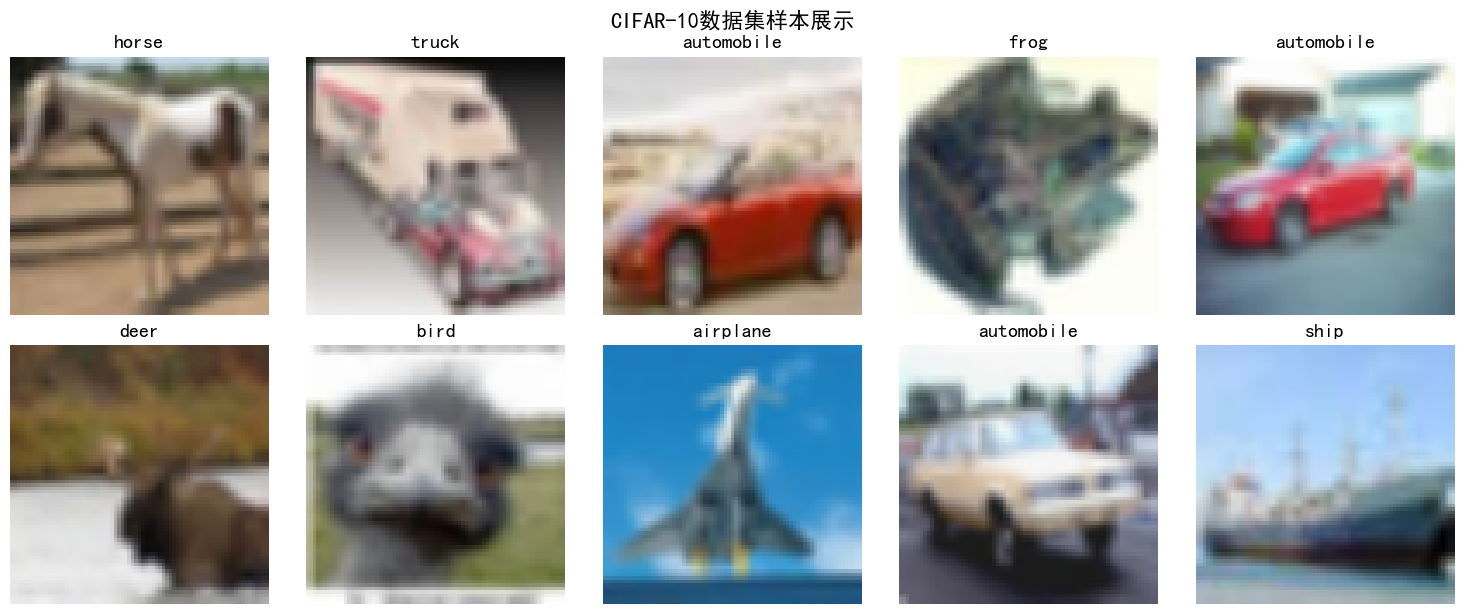

In [19]:
# ÂÆö‰πâCIFAR10Êï∞ÊçÆÈõÜÁöÑ10‰∏™Á±ªÂà´ÂêçÁß∞
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

def visualize_dataset(x_data, y_data, class_names, num_samples=10):
    """
    ÂèØËßÜÂåñÊï∞ÊçÆÈõÜ‰∏≠ÁöÑÊ†∑Êú¨ÂõæÁâáÔºåÂ±ïÁ§∫ÊØè‰∏™Á±ªÂà´ÁöÑÁ§∫‰æã
    
    ÂèÇÊï∞:
    x_data: ÂõæÂÉèÊï∞ÊçÆ
    y_data: Ê†áÁ≠æÊï∞ÊçÆÔºàone-hotÁºñÁ†ÅÔºâ
    class_names: Á±ªÂà´ÂêçÁß∞ÂàóË°®
    num_samples: Ë¶ÅÂ±ïÁ§∫ÁöÑÊ†∑Êú¨Êï∞ÈáèÔºåÈªòËÆ§‰∏∫10ÔºàÊØè‰∏™Á±ªÂà´‰∏Ä‰∏™Ôºâ
    """
    
    # ÂàõÂª∫ÂõæÂΩ¢Á™óÂè£Ôºå2Ë°å5ÂàóÔºåËÆæÁΩÆÊï¥‰ΩìÂ∞∫ÂØ∏
    plt.figure(figsize=(15, 6))
    
    # ÈÅçÂéÜ10‰∏™Ê†∑Êú¨ÔºåÊØè‰∏™Ê†∑Êú¨ÂØπÂ∫î‰∏Ä‰∏™Á±ªÂà´
    for i in range(num_samples):
        # ÂàõÂª∫Â≠êÂõæÔºå2Ë°å5ÂàóÂ∏ÉÂ±Ä
        plt.subplot(2, 5, i+1)
        # ÊòæÁ§∫ÂõæÂÉè
        plt.imshow(x_data[i])
        # ËÆæÁΩÆÊ†áÈ¢ò‰∏∫ÂØπÂ∫îÁöÑÁ±ªÂà´ÂêçÁß∞
        # np.argmaxÊâæÂà∞one-hotÁºñÁ†Å‰∏≠ÊúÄÂ§ßÂÄºÁöÑ‰ΩçÁΩÆÔºåÂç≥Á±ªÂà´Á¥¢Âºï
        plt.title(f'{class_names[np.argmax(y_data[i])]}')
        # ÂÖ≥Èó≠ÂùêÊ†áËΩ¥ÔºåËÆ©ÂõæÁâáÊõ¥Ê∏ÖÊô∞
        plt.axis('off')
    
    # Ëá™Âä®Ë∞ÉÊï¥Â≠êÂõæÈó¥Ë∑ùÔºåÈÅøÂÖçÈáçÂè†
    plt.tight_layout()
    # Ê∑ªÂä†ÊÄªÊ†áÈ¢ò
    plt.suptitle('CIFAR-10Êï∞ÊçÆÈõÜÊ†∑Êú¨Â±ïÁ§∫', fontsize=16, y=1.02)
    # ÊòæÁ§∫ÂõæÂΩ¢
    plt.show()

# Â±ïÁ§∫ËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑÊ†∑Êú¨ÔºåÊØè‰∏™Á±ªÂà´Â±ïÁ§∫‰∏Ä‰∏™Á§∫‰æã
visualize_dataset(x_train_final, y_train_final, class_names)

# Á¨¨ÂõõÊ≠• ÊûÑÂª∫ËøÅÁßªÂ≠¶‰π†Ê®°Âûã

In [20]:
def create_transfer_learning_model(input_shape=(75, 75, 3), num_classes=10):
    """
    ÂàõÂª∫Âü∫‰∫éMobileNetV2ÁöÑËøÅÁßªÂ≠¶‰π†Ê®°Âûã
    
    ÂèÇÊï∞:
    input_shape: ËæìÂÖ•ÂõæÂÉèÂΩ¢Áä∂ÔºåÈªòËÆ§‰∏∫75x75x3
    num_classes: ÂàÜÁ±ªÁ±ªÂà´Êï∞ÔºåCIFAR10‰∏∫10
    
    ËøîÂõû:
    model: ÊûÑÂª∫Â•ΩÁöÑKerasÊ®°Âûã
    base_model: Âü∫Á°ÄÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÔºàÁî®‰∫éÂêéÁª≠ÂæÆË∞ÉÔºâ
    
    ÈÄâÊã©MobileNetV2ÁöÑÂéüÂõ†Ôºö
    - Âú®‰øùÊåÅËæÉÈ´òÁ≤æÂ∫¶ÁöÑÂêåÊó∂ÂèÇÊï∞ËæÉÂ∞ë
    - ÈÄÇÂêàCIFAR10ËøôÁßçÁõ∏ÂØπÁÆÄÂçïÁöÑÊï∞ÊçÆÈõÜ
    - ËÆ°ÁÆóÊïàÁéáÈ´òÔºåËÆ≠ÁªÉÈÄüÂ∫¶Âø´
    """
    
    # Âä†ËΩΩÈ¢ÑËÆ≠ÁªÉÁöÑMobileNetV2Ê®°Âûã
    # weights='imagenet': ‰ΩøÁî®Âú®ImageNetÊï∞ÊçÆÈõÜ‰∏äÈ¢ÑËÆ≠ÁªÉÁöÑÊùÉÈáç
    # include_top=False: ‰∏çÂåÖÂê´È°∂ÈÉ®ÁöÑÂÖ®ËøûÊé•Â±ÇÔºåÂè™‰ΩøÁî®ÁâπÂæÅÊèêÂèñÈÉ®ÂàÜ
    # input_shape: ÊåáÂÆöËæìÂÖ•ÂõæÂÉèÁöÑÂ∞∫ÂØ∏
    base_model = applications.MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )
    
    # ÂÜªÁªìÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÁöÑÊâÄÊúâÂ±ÇÔºåÂú®ÂàùÂßãËÆ≠ÁªÉÈò∂ÊÆµ‰∏çÊõ¥Êñ∞Ëøô‰∫õÂ±ÇÁöÑÊùÉÈáç
    # ËøôÊ†∑ÂèØ‰ª•Âà©Áî®ImageNet‰∏äÂ≠¶Âà∞ÁöÑÈÄöÁî®ÁâπÂæÅÔºåÈÅøÂÖç‰ªéÂ§¥ÂºÄÂßãËÆ≠ÁªÉ
    base_model.trainable = False
    # ÊûÑÂª∫Êñ∞ÁöÑÊ®°ÂûãÊû∂ÊûÑ
    # ÂÆö‰πâËæìÂÖ•Â±ÇÔºåÂΩ¢Áä∂‰∏∫(75, 75, 3)
    inputs = layers.Input(shape=input_shape)
    
    # ‰ΩøÁî®È¢ÑËÆ≠ÁªÉÊ®°Âûã‰Ωú‰∏∫ÁâπÂæÅÊèêÂèñÂô®
    # training=FalseÁ°Æ‰øùÂú®Êé®ÁêÜÊ®°Âºè‰∏ãËøêË°åÊâπÂΩí‰∏ÄÂåñÂ±Ç
    x = base_model(inputs, training=False)
    
    # Ê∑ªÂä†ÂÖ®Â±ÄÂπ≥ÂùáÊ±†ÂåñÂ±ÇÔºåÂ∞ÜÊØè‰∏™ÁâπÂæÅÂõæËΩ¨Êç¢‰∏∫Âçï‰∏™Êï∞ÂÄº
    # ËøôÂ§ßÂ§ßÂáèÂ∞ë‰∫ÜÂèÇÊï∞Êï∞ÈáèÔºåÈÅøÂÖç‰∫ÜÂÖ®ËøûÊé•Â±ÇÁöÑËøáÊãüÂêàÈ£éÈô©
    x = layers.GlobalAveragePooling2D()(x)
    
    # Ê∑ªÂä†DropoutÂ±ÇÔºåÈöèÊú∫‰∏¢ÂºÉ30%ÁöÑÁ•ûÁªèÂÖÉ
    # ËøôÊòØ‰∏ÄÁßçÊ≠£ÂàôÂåñÊäÄÊúØÔºåÊúâÂä©‰∫éÈò≤Ê≠¢ËøáÊãüÂêà
    x = layers.Dropout(0.3)(x)
    
    # Ê∑ªÂä†ÂÖ®ËøûÊé•Â±ÇÔºå128‰∏™Á•ûÁªèÂÖÉÔºå‰ΩøÁî®ReLUÊøÄÊ¥ªÂáΩÊï∞
    x = layers.Dense(128, activation='relu')(x)
    # Ê∑ªÂä†ÊâπÂΩí‰∏ÄÂåñÂ±ÇÔºåÂä†ÈÄüËÆ≠ÁªÉÂπ∂ÊèêÈ´òÁ®≥ÂÆöÊÄß
    x = layers.BatchNormalization()(x)
    # ÂÜçÊ¨°Ê∑ªÂä†DropoutÂ±ÇÔºåËøõ‰∏ÄÊ≠•Èò≤Ê≠¢ËøáÊãüÂêà
    x = layers.Dropout(0.3)(x)
    
    # ËæìÂá∫Â±ÇÔºå10‰∏™Á•ûÁªèÂÖÉÂØπÂ∫î10‰∏™Á±ªÂà´Ôºå‰ΩøÁî®softmaxÊøÄÊ¥ªÂáΩÊï∞ËæìÂá∫Ê¶ÇÁéáÂàÜÂ∏É
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    # ÂàõÂª∫ÂÆåÊï¥ÁöÑÊ®°ÂûãÔºåÊåáÂÆöËæìÂÖ•ÂíåËæìÂá∫
    model = models.Model(inputs, outputs)
    return model, base_model

# ÂàõÂª∫ËøÅÁßªÂ≠¶‰π†Ê®°ÂûãÔºåbase_modelÁî®‰∫éÂêéÈù¢Ë∞ÉÊéßËÆ≠ÁªÉ‰∏éÈùûËÆ≠ÁªÉ
model, base_model = create_transfer_learning_model()
# ÊâìÂç∞Ê®°ÂûãÊû∂ÊûÑÊëòË¶ÅÔºåÊòæÁ§∫ÂêÑÂ±ÇÁöÑËæìÂá∫ÂΩ¢Áä∂ÂíåÂèÇÊï∞Êï∞Èáè
model.summary()

C:\Users\chenx\AppData\Local\Temp\ipykernel_27860\910722580.py:23: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = applications.MobileNetV2(


Model: "functional_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_3 (InputLayer)      ‚îÇ (None, 75, 75, 3)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ mobilenetv2_1.00_224            ‚îÇ (None, 3, 3, 1280)     ‚îÇ     2,257,984 ‚îÇ
‚îÇ (Functional)                    ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ global_average_pooling2d_1      ‚îÇ (None, 1280)           ‚îÇ             0 ‚îÇ
‚îÇ (GlobalAveragePooling2D)        ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_2 (Dropout)             ‚îÇ (None, 1280)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 128)            ‚îÇ       163,968 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_1           ‚îÇ (None, 128)            ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ (None, 128)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                 ‚îÇ (None, 10)             ‚îÇ         1,290 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 2,423,754 (9.25 MB)

 Trainable params: 165,514 (646.54 KB)

 Non-trainable params: 2,258,240 (8.61 MB)

# Ê®°ÂûãÂèÇÊï∞Ëß£ËØª

1. ËæìÂÖ•Â±Ç: (75, 75, 3)
   - Â∞ÜÂéüÂßã32x32ÂõæÂÉè‰∏äÈááÊ†∑Âà∞75x75‰ª•ÈÄÇÂ∫îÈ¢ÑËÆ≠ÁªÉÊ®°Âûã
   - 3ÈÄöÈÅìRGBÂΩ©Ëâ≤ÂõæÂÉè
   - Êó†ÂèÇÊï∞ÔºåÂè™ÊòØÂÆö‰πâËæìÂÖ•Ê†ºÂºè

2. MobileNetV2Âü∫Á°ÄÊ®°Âûã (È¢ÑËÆ≠ÁªÉÂêéÁöÑÔºåÂπ∂ÂÜªÁªìÊùÉÈáç):
   - ÂèÇÊï∞Èáè: 2257984
   - Ëøô‰∫õÂèÇÊï∞Âú®ÂàùÂßãËÆ≠ÁªÉÈò∂ÊÆµË¢´ÂÜªÁªìÔºå‰∏çÂèÇ‰∏éËÆ≠ÁªÉ
   - Áî®‰ΩúÁâπÂæÅÊèêÂèñÂô®ÔºåÂà©Áî®Âú®ImageNet‰∏äÂ≠¶Âà∞ÁöÑÈÄöÁî®ÁâπÂæÅ
   - ÂåÖÂê´ÂÄíÁΩÆÊÆãÂ∑ÆÁªìÊûÑÂíåÊ∑±Â∫¶ÂèØÂàÜÁ¶ªÂç∑ÁßØÔºåÊïàÁéáÈ´ò

3. ÂÖ®Â±ÄÂπ≥ÂùáÊ±†ÂåñÂ±Ç:
   - Â∞ÜÁâπÂæÅÂõæËΩ¨Êç¢‰∏∫ÁâπÂæÅÂêëÈáè
   - Êó†ÂèÇÊï∞ÔºåÂè™ÊòØÂØπÊØè‰∏™ÁâπÂæÅÂõæÂèñÂπ≥ÂùáÂÄº

4. DropoutÂ±Ç (0.3):
   - ÈöèÊú∫‰∏¢ÂºÉ30%ÁöÑÁ•ûÁªèÂÖÉÈò≤Ê≠¢ËøáÊãüÂêà
   - Êó†ÂèÇÊï∞ÔºåÂè™ÊòØÂú®ÂâçÂêë‰º†Êí≠Êó∂ÈöèÊú∫Â±èËîΩÈÉ®ÂàÜÁ•ûÁªèÂÖÉ

5. ÂÖ®ËøûÊé•Â±Ç (128‰∏™Á•ûÁªèÂÖÉ):
   - ÂèÇÊï∞Èáè: (1280 + 1) √ó 128 = 163968
   - ËæìÂÖ•: 1280Áª¥ÁâπÂæÅÂêëÈáè (Êù•Ëá™ÂÖ®Â±ÄÂπ≥ÂùáÊ±†Âåñ)
   - ÊØè‰∏™Á•ûÁªèÂÖÉÊúâ1281‰∏™ÂèÇÊï∞(1280ÊùÉÈáç + 1ÂÅèÁΩÆ)
   - ‰ΩøÁî®ReLUÊøÄÊ¥ªÂáΩÊï∞ÂºïÂÖ•ÈùûÁ∫øÊÄß

6. ÊâπÂΩí‰∏ÄÂåñÂ±Ç:
   - ÂèÇÊï∞Èáè: 512 (128√ó4)
   - ÂåÖÂê´ÂèØÂ≠¶‰π†ÁöÑÁº©ÊîæÂèÇÊï∞Œ≥ÂíåÂÅèÁßªÂèÇÊï∞Œ≤ÂêÑ128‰∏™
   - ÂåÖÂê´ÁßªÂä®Âπ≥ÂùáÁöÑÂùáÂÄºŒºÂíåÊñπÂ∑ÆœÉÂêÑ128‰∏™Ôºà‰∏çÂèÇ‰∏éËÆ≠ÁªÉÔºâ
   - Âä†ÈÄüËÆ≠ÁªÉÔºåÊèêÈ´òÁ®≥ÂÆöÊÄß

7. Á¨¨‰∫å‰∏™DropoutÂ±Ç (0.3):
   - Ëøõ‰∏ÄÊ≠•Èò≤Ê≠¢ËøáÊãüÂêà
   - Êó†ÂèÇÊï∞

8. ËæìÂá∫Â±Ç (10‰∏™Á•ûÁªèÂÖÉ):
   - ÂèÇÊï∞Èáè: (128 + 1) √ó 10 = 1290
   - ÂØπÂ∫î10‰∏™ÂàÜÁ±ªÁ±ªÂà´
   - ‰ΩøÁî®softmaxÊøÄÊ¥ªÂáΩÊï∞ËæìÂá∫Ê¶ÇÁéáÂàÜÂ∏É

ÊÄªÂèÇÊï∞Èáè: 2423754
ÂèØËÆ≠ÁªÉÂèÇÊï∞Èáè: 165258 (‰ªÖÊñ∞Ê∑ªÂä†ÁöÑÂ±Ç)
ÈùûËÆ≠ÁªÉÂèÇÊï∞Èáè: 2257984 (È¢ÑËÆ≠ÁªÉÊ®°Âûã)

ÂèÇÊï∞ËÆ°ÁÆóËØ¥ÊòéÔºö
- Âü∫Á°ÄÊ®°ÂûãÂèÇÊï∞Âú®ÂàùÂßãÈò∂ÊÆµÂÜªÁªìÔºåÂè™ËÆ≠ÁªÉÊñ∞Ê∑ªÂä†ÁöÑÂàÜÁ±ªÂ§¥
- ËøôÁßçÁ≠ñÁï•ÂÖÖÂàÜÂà©Áî®È¢ÑËÆ≠ÁªÉÁü•ËØÜÔºåÂêåÊó∂ÈÄÇÂ∫îÊñ∞‰ªªÂä°


# Á¨¨‰∫îÊ≠• ÂØπËÆ≠ÁªÉÊï∞ÊçÆÂÅöÂ¢ûÂº∫Â§ÑÁêÜ

In [21]:
# ÂàõÂª∫Êï∞ÊçÆÂ¢ûÂº∫ÁîüÊàêÂô®
# Êï∞ÊçÆÂ¢ûÂº∫ÈÄöËøáÂØπËÆ≠ÁªÉÂõæÂÉèËøõË°åÈöèÊú∫ÂèòÊç¢Êù•Â¢ûÂä†Êï∞ÊçÆÂ§öÊ†∑ÊÄß
# ËøôÊúâÂä©‰∫éÊèêÈ´òÊ®°ÂûãÁöÑÊ≥õÂåñËÉΩÂäõÔºåÈò≤Ê≠¢ËøáÊãüÂêà
train_datagen = ImageDataGenerator(
    rotation_range=15,        # ÈöèÊú∫ÊóãËΩ¨ËßíÂ∫¶ËåÉÂõ¥ÔºàÂ∫¶Ôºâ
    width_shift_range=0.1,    # ÈöèÊú∫Ê∞¥Âπ≥Âπ≥ÁßªËåÉÂõ¥ÔºàÂç†ÊÄªÂÆΩÂ∫¶ÁöÑÊØî‰æãÔºâ
    height_shift_range=0.1,   # ÈöèÊú∫ÂûÇÁõ¥Âπ≥ÁßªËåÉÂõ¥ÔºàÂç†ÊÄªÈ´òÂ∫¶ÁöÑÊØî‰æãÔºâ
    horizontal_flip=True,     # ÈöèÊú∫Ê∞¥Âπ≥ÁøªËΩ¨
    zoom_range=0.1,           # ÈöèÊú∫Áº©ÊîæËåÉÂõ¥
    shear_range=0.1           # ÈöèÊú∫ÈîôÂàáÂèòÊç¢ËåÉÂõ¥
)

# ‰ΩøÁî®Êï∞ÊçÆÂ¢ûÂº∫ÁîüÊàêÂô®
# Ëøô‰ºöÂú®ËÆ≠ÁªÉÊó∂ÂÆûÊó∂ÁîüÊàêÂ¢ûÂº∫ÂêéÁöÑÂõæÂÉèÔºå‰∏çÂ¢ûÂä†ÂÜÖÂ≠òÂç†Áî®
train_generator = train_datagen.flow(
    x_train_final, y_train_final,  # ËÆ≠ÁªÉÊï∞ÊçÆÂíåÊ†áÁ≠æ
    batch_size=64                  # ÊØè‰∏™ÊâπÊ¨°ÁöÑÊ†∑Êú¨Êï∞Èáè
)

print("Êï∞ÊçÆÂ¢ûÂº∫ÈÖçÁΩÆÂÆåÊàêÔºåÂ∞ÜÂú®ËÆ≠ÁªÉÊó∂ÂÆûÊó∂Â∫îÁî®ÂêÑÁßçÂõæÂÉèÂèòÊç¢")

Êï∞ÊçÆÂ¢ûÂº∫ÈÖçÁΩÆÂÆåÊàêÔºåÂ∞ÜÂú®ËÆ≠ÁªÉÊó∂ÂÆûÊó∂Â∫îÁî®ÂêÑÁßçÂõæÂÉèÂèòÊç¢


# Á¨¨ÂÖ≠Ê≠• Ê®°ÂûãÁöÑÁºñËØë‰∏éËÆ≠ÁªÉ

In [29]:
# ÁºñËØëÊ®°ÂûãÔºåÈÖçÁΩÆËÆ≠ÁªÉËøáÁ®ã
model.compile(
    optimizer=Adam(learning_rate=0.001),  # ‰ΩøÁî®Adam‰ºòÂåñÂô®ÔºåÂ≠¶‰π†Áéá0.001
    loss='categorical_crossentropy',      # ÂàÜÁ±ª‰∫§ÂèâÁÜµÊçüÂ§±ÂáΩÊï∞ÔºåÈÄÇÁî®‰∫éÂ§öÂàÜÁ±ª
    metrics=['accuracy']                   # ÁõëÊéßÂáÜÁ°ÆÁéáÊåáÊ†á
)

# ËÆæÁΩÆÊ®°ÂûãÊ£ÄÊü•ÁÇπÂõûË∞ÉÂáΩÊï∞
# Áî®‰∫éÂú®ËÆ≠ÁªÉËøáÁ®ã‰∏≠‰øùÂ≠òÈ™åËØÅÈõÜ‰∏äÊÄßËÉΩÊúÄÂ•ΩÁöÑÊ®°Âûã
checkpoint = ModelCheckpoint(
    'best_model.h5',           # ‰øùÂ≠òÊ®°ÂûãÁöÑÊñá‰ª∂Âêç
    monitor='val_accuracy',    # ÁõëÊéßÈ™åËØÅÈõÜÂáÜÁ°ÆÁéá
    save_best_only=True,       # Âè™‰øùÂ≠òÊúÄÂ•ΩÁöÑÊ®°Âûã
    verbose=1                  # ÊòæÁ§∫‰øùÂ≠ò‰ø°ÊÅØ
)

# ËÆæÁΩÆÊó©ÂÅúÂõûË∞ÉÂáΩÊï∞
# ÂΩìÈ™åËØÅÈõÜÊÄßËÉΩ‰∏çÂÜçÊèêÂçáÊó∂ÊèêÂâçÂÅúÊ≠¢ËÆ≠ÁªÉÔºåÈÅøÂÖçËøáÊãüÂêà
early_stop = EarlyStopping(
    monitor='val_accuracy',    # ÁõëÊéßÈ™åËØÅÈõÜÂáÜÁ°ÆÁéá
    patience=10,               # ÂÆπÂøçËøûÁª≠10‰∏™epochÊ≤°ÊúâÊèêÂçá
    restore_best_weights=True, # ÊÅ¢Â§çÊúÄ‰Ω≥ÊùÉÈáç
    verbose=1                  # ÊòæÁ§∫Êó©ÂÅú‰ø°ÊÅØ
)

# Á¨¨‰∏ÄÈò∂ÊÆµËÆ≠ÁªÉÔºöÂè™ËÆ≠ÁªÉÊñ∞Ê∑ªÂä†ÁöÑÂ±ÇÔºåÂÜªÁªìÈ¢ÑËÆ≠ÁªÉÊ®°Âûã
print("=== Á¨¨‰∏ÄÈò∂ÊÆµËÆ≠ÁªÉÔºöËÆ≠ÁªÉÊñ∞Ê∑ªÂä†ÁöÑÂ±Ç ===")
print("Âú®Ê≠§Èò∂ÊÆµÔºåÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÁöÑÊùÉÈáçË¢´ÂÜªÁªìÔºåÂè™Êõ¥Êñ∞Êñ∞Ê∑ªÂä†ÁöÑÂàÜÁ±ªÂ§¥")
print("ËøôÂà©Áî®‰∫ÜÈ¢ÑËÆ≠ÁªÉÊ®°ÂûãÁöÑÈÄöÁî®ÁâπÂæÅÊèêÂèñËÉΩÂäõ")

history1 = model.fit(
    train_generator,                    # ‰ΩøÁî®Êï∞ÊçÆÂ¢ûÂº∫ÁöÑËÆ≠ÁªÉÊï∞ÊçÆÁîüÊàêÂô®
    epochs=100,                          # ËÆ≠ÁªÉËΩÆÊï∞
    validation_data=(x_val, y_val),     # È™åËØÅÊï∞ÊçÆÈõÜÔºåÁî®‰∫éÁõëÊéßÊ≥õÂåñÊÄßËÉΩ
    callbacks=[checkpoint, early_stop], # ‰ΩøÁî®ÂÆö‰πâÁöÑÂõûË∞ÉÂáΩÊï∞
    verbose=1                           # ÊòæÁ§∫ËÆ≠ÁªÉËøõÂ∫¶
)

# Á¨¨‰∏ÉÊ≠• fine tune

In [28]:
# ÂÆö‰πâÂæÆË∞ÉÂáΩÊï∞ÔºåËß£ÂÜªÂü∫Á°ÄÊ®°ÂûãÁöÑÈÉ®ÂàÜÂ±ÇËøõË°åÁ≤æÁªÜË∞ÉÊï¥ÔºåÊ≥®ÊÑèÔºåmodel‰∏ébase_modelÊòØÂÖ±‰∫´Â±ÇÂØπË±°ÁöÑÔºÅÔºÅÔºÅ
def unfreeze_and_fine_tune(model, base_model, fine_tune_at=100):
    """
    Ëß£ÂÜªÂü∫Á°ÄÊ®°ÂûãÁöÑÈÉ®ÂàÜÂ±ÇËøõË°åÂæÆË∞É

    ÂèÇÊï∞:
    model: Â∑≤ËÆ≠ÁªÉÁöÑÊ®°Âûã
    base_model: Âü∫Á°ÄÈ¢ÑËÆ≠ÁªÉÊ®°Âûã
    fine_tune_at: ‰ªéÁ¨¨Âá†Â±ÇÂºÄÂßãËß£ÂÜªÔºàËß£ÂÜªÂêéÈù¢ÁöÑÂ±ÇÔºâ

    ËøîÂõû:
    ÈáçÊñ∞ÁºñËØëÂêéÁöÑÊ®°Âûã
    """

    # Ëß£ÂÜªÂü∫Á°ÄÊ®°ÂûãÁöÑÊâÄÊúâÂ±ÇÔºå‰ΩøÂÖ∂ÂèØËÆ≠ÁªÉ
    base_model.trainable = True

    # ÂÜªÁªìÂâçÈù¢ÁöÑÂ±ÇÔºåÂè™ËÆ≠ÁªÉÂêéÈù¢ÁöÑÂ±Ç
    # ÂâçÈù¢ÁöÑÂ±ÇÂ≠¶‰π†ÈÄöÁî®ÁâπÂæÅÔºåÂêéÈù¢ÁöÑÂ±ÇÂ≠¶‰π†ÁâπÂÆöÁâπÂæÅ
    # ÈÄöËøáÂè™ÂæÆË∞ÉÂêéÈù¢Â±ÇÔºåÂèØ‰ª•Âú®ÈÅøÂÖçÁÅæÈöæÊÄßÈÅóÂøòÁöÑÂêåÊó∂ÈÄÇÂ∫îÊñ∞‰ªªÂä°
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    # ÈáçÊñ∞ÁºñËØëÊ®°ÂûãÔºå‰ΩøÁî®Êõ¥Â∞èÁöÑÂ≠¶‰π†Áéá
    # ÂæÆË∞ÉÈò∂ÊÆµ‰ΩøÁî®Êõ¥Â∞èÁöÑÂ≠¶‰π†ÁéáÔºåÈÅøÂÖçÁ†¥ÂùèÂ∑≤Â≠¶Âà∞ÁöÑÁâπÂæÅ
    model.compile(
        optimizer=Adam(learning_rate=0.0001/10),  # ÈùûÂ∏∏Â∞èÁöÑÂ≠¶‰π†Áéá
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# ËøõË°åÂæÆË∞ÉÔºåËß£ÂÜªÂü∫Á°ÄÊ®°ÂûãÁöÑÂêéÂçäÈÉ®ÂàÜÂ±Ç
model = unfreeze_and_fine_tune(model, base_model)

print("=== Á¨¨‰∫åÈò∂ÊÆµËÆ≠ÁªÉÔºöÂæÆË∞ÉÈ¢ÑËÆ≠ÁªÉÊ®°Âûã ===")
print("Âú®Ê≠§Èò∂ÊÆµÔºåËß£ÂÜª‰∫ÜÂü∫Á°ÄÊ®°ÂûãÁöÑÈÉ®ÂàÜÈ´òÂ±ÇÔºå‰ΩøÁî®Êõ¥Â∞èÁöÑÂ≠¶‰π†ÁéáËøõË°åÂæÆË∞É")
print("Ëøô‰ΩøÊ®°ÂûãËÉΩÂ§üÊõ¥Â•ΩÂú∞ÈÄÇÂ∫îCIFAR10Êï∞ÊçÆÈõÜÁöÑÁâπÂÆöÁâπÂæÅ")

# Á¨¨‰∫åÈò∂ÊÆµËÆ≠ÁªÉÔºöÂæÆË∞ÉËß£ÂÜªÁöÑÂ±Ç
history2 = model.fit(
    train_generator,                    # ÁªßÁª≠‰ΩøÁî®Êï∞ÊçÆÂ¢ûÂº∫
    epochs=50,                          # ÂæÆË∞ÉËΩÆÊï∞ËæÉÂ∞ë
    validation_data=(x_val, y_val),     # ÁªßÁª≠‰ΩøÁî®È™åËØÅÈõÜÁõëÊéß
    callbacks=[checkpoint, early_stop], # ÂêåÊ†∑ÁöÑÂõûË∞ÉÂáΩÊï∞
    verbose=1                           # ÊòæÁ§∫ËÆ≠ÁªÉËøõÂ∫¶
)

# Á¨¨ÂÖ´Ê≠• Ê®°ÂûãËØÑ‰º∞

üöÄ **ÊµãËØïÈõÜÊúÄÈ´òÁ≤æÂ∫¶: 87.89%** üöÄ


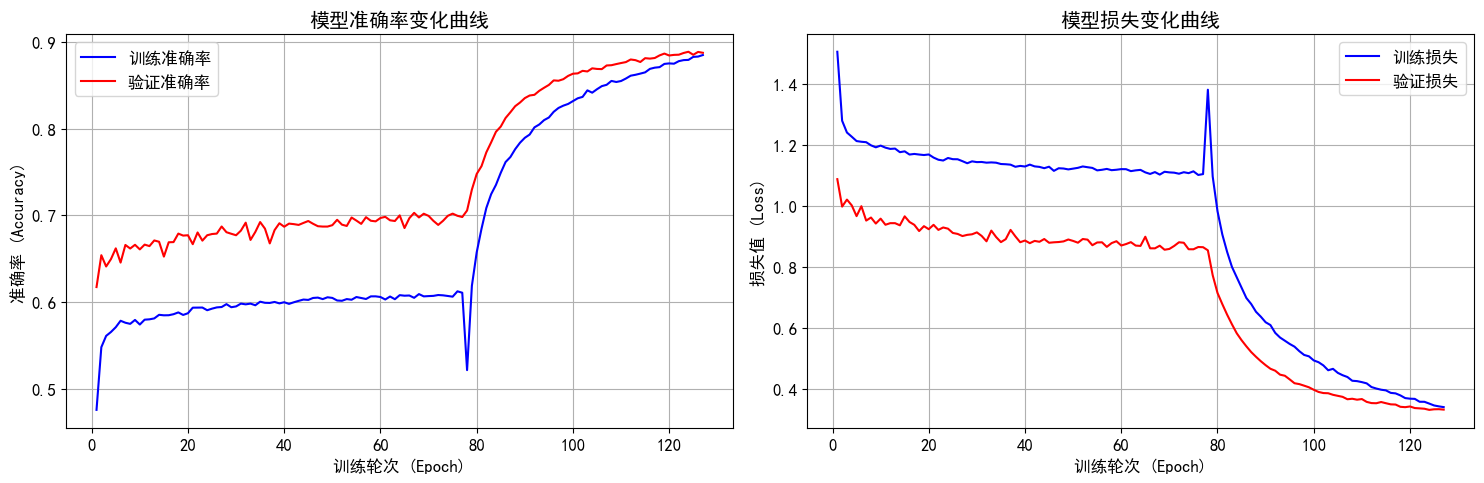

In [24]:
# Âä†ËΩΩËÆ≠ÁªÉËøáÁ®ã‰∏≠‰øùÂ≠òÁöÑÊúÄ‰Ω≥Ê®°Âûã
from tensorflow.keras.models import load_model
best_model = load_model('best_model.h5')

# Âú®ÊµãËØïÈõÜ‰∏äËØÑ‰º∞ÊúÄ‰Ω≥Ê®°ÂûãÁöÑÊÄßËÉΩ
# verbose=0Ë°®Á§∫‰∏çÊòæÁ§∫ËØÑ‰º∞ËøõÂ∫¶Êù°
test_loss, test_accuracy = best_model.evaluate(x_test_processed, y_test_categorical, verbose=0)

# Á™ÅÂá∫ÊòæÁ§∫ÊúÄÁªàÊµãËØïÁ≤æÂ∫¶
print("=" * 50)
print(f"üöÄ **ÊµãËØïÈõÜÊúÄÈ´òÁ≤æÂ∫¶: {test_accuracy*100:.2f}%** üöÄ")
print("=" * 50)

# ÂÆö‰πâËÆ≠ÁªÉÂéÜÂè≤ÂèØËßÜÂåñÂáΩÊï∞
def plot_training_history(history1, history2):
    """
    ÁªòÂà∂ËÆ≠ÁªÉËøáÁ®ã‰∏≠ÁöÑÂáÜÁ°ÆÁéáÂíåÊçüÂ§±Êõ≤Á∫ø
    
    ÂèÇÊï∞:
    history1: Á¨¨‰∏ÄÈò∂ÊÆµËÆ≠ÁªÉÂéÜÂè≤
    history2: Á¨¨‰∫åÈò∂ÊÆµËÆ≠ÁªÉÂéÜÂè≤
    """
    # ÂàõÂª∫1Ë°å2ÂàóÁöÑÂ≠êÂõæ
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # ÂêàÂπ∂‰∏§‰∏™Èò∂ÊÆµÁöÑËÆ≠ÁªÉÂéÜÂè≤
    acc = history1.history['accuracy'] + history2.history['accuracy']
    val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
    loss = history1.history['loss'] + history2.history['loss']
    val_loss = history1.history['val_loss'] + history2.history['val_loss']
    
    # ÂàõÂª∫epochËåÉÂõ¥
    epochs_range = range(1, len(acc) + 1)
    
    # ÁªòÂà∂ÂáÜÁ°ÆÁéáÊõ≤Á∫ø
    ax1.plot(epochs_range, acc, 'b-', label='ËÆ≠ÁªÉÂáÜÁ°ÆÁéá')
    ax1.plot(epochs_range, val_acc, 'r-', label='È™åËØÅÂáÜÁ°ÆÁéá')
    ax1.set_title('Ê®°ÂûãÂáÜÁ°ÆÁéáÂèòÂåñÊõ≤Á∫ø')
    ax1.set_xlabel('ËÆ≠ÁªÉËΩÆÊ¨° (Epoch)')
    ax1.set_ylabel('ÂáÜÁ°ÆÁéá (Accuracy)')
    ax1.legend()  # ÊòæÁ§∫Âõæ‰æã
    ax1.grid(True)  # ÊòæÁ§∫ÁΩëÊ†º
    
    # ÁªòÂà∂ÊçüÂ§±Êõ≤Á∫ø
    ax2.plot(epochs_range, loss, 'b-', label='ËÆ≠ÁªÉÊçüÂ§±')
    ax2.plot(epochs_range, val_loss, 'r-', label='È™åËØÅÊçüÂ§±')
    ax2.set_title('Ê®°ÂûãÊçüÂ§±ÂèòÂåñÊõ≤Á∫ø')
    ax2.set_xlabel('ËÆ≠ÁªÉËΩÆÊ¨° (Epoch)')
    ax2.set_ylabel('ÊçüÂ§±ÂÄº (Loss)')
    ax2.legend()  # ÊòæÁ§∫Âõæ‰æã
    ax2.grid(True)  # ÊòæÁ§∫ÁΩëÊ†º
    
    # Ëá™Âä®Ë∞ÉÊï¥Â≠êÂõæÈó¥Ë∑ù
    plt.tight_layout()
    # ÊòæÁ§∫ÂõæÂΩ¢
    plt.show()

# ÁªòÂà∂ËÆ≠ÁªÉÂéÜÂè≤ÂõæË°®
plot_training_history(history1, history2)

# Á¨¨‰πùÊ≠• È¢ÑÊµãÁªìÊûúÂèØËßÜÂåñ

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 798ms/step


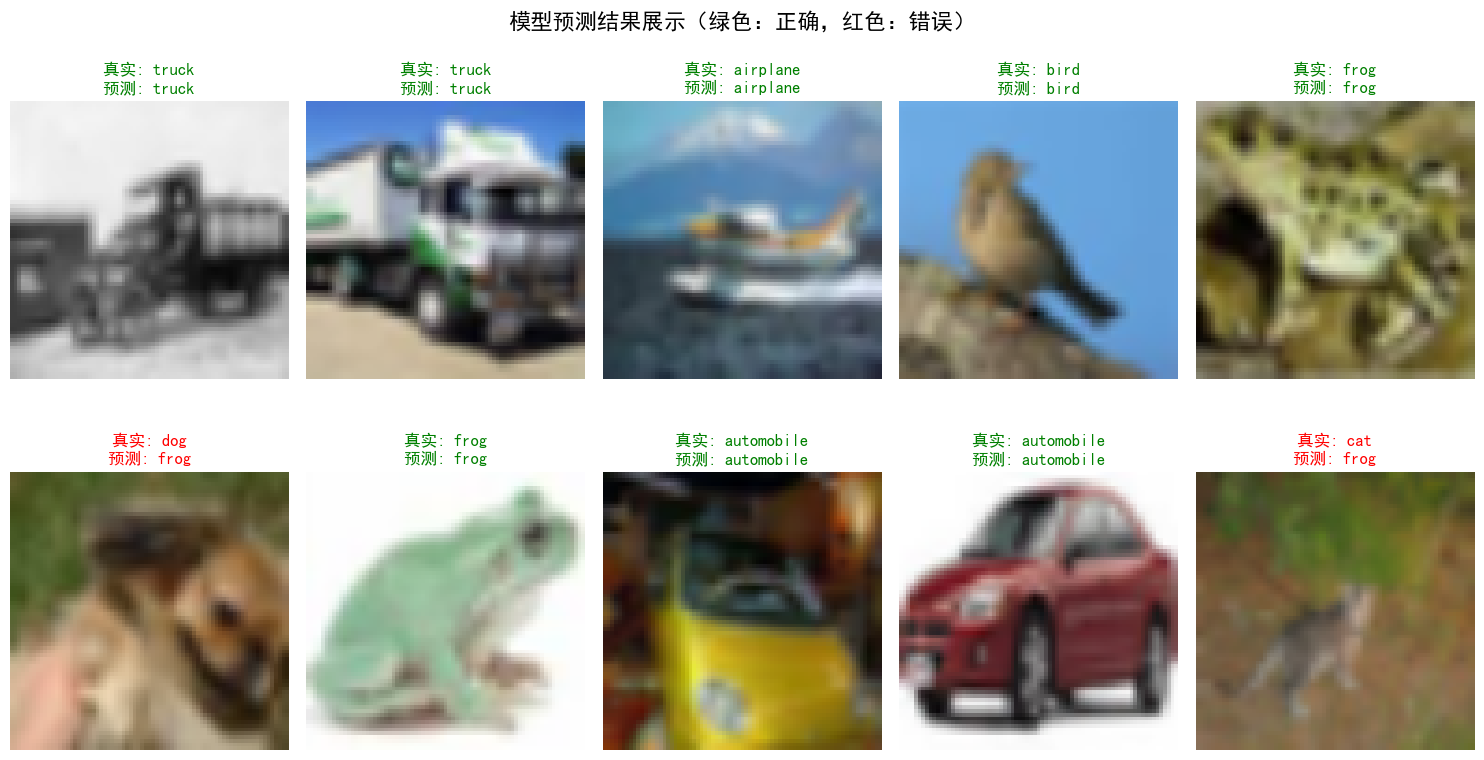

ÈöèÊú∫10‰∏™Ê†∑Êú¨ÁöÑÂáÜÁ°ÆÁéá: 80.0%


In [25]:
def visualize_predictions(model, x_test, y_test, class_names, num_samples=10):
    """
    ÂèØËßÜÂåñÊ®°ÂûãÈ¢ÑÊµãÁªìÊûúÔºåÂ±ïÁ§∫ÂéüÂßãÊ†áÁ≠æÂíåÈ¢ÑÊµãÊ†áÁ≠æ
    
    ÂèÇÊï∞:
    model: ËÆ≠ÁªÉÂ•ΩÁöÑÊ®°Âûã
    x_test: ÊµãËØïÂõæÂÉèÊï∞ÊçÆ
    y_test: ÊµãËØïÊ†áÁ≠æÔºàone-hotÁºñÁ†ÅÔºâ
    class_names: Á±ªÂà´ÂêçÁß∞ÂàóË°®
    num_samples: Ë¶ÅÂ±ïÁ§∫ÁöÑÊ†∑Êú¨Êï∞Èáè
    """
    
    # ‰ªéÊµãËØïÈõÜ‰∏≠ÈöèÊú∫ÈÄâÊã©Ê†∑Êú¨ÔºåÈÅøÂÖçÈáçÂ§ç
    indices = np.random.choice(len(x_test), num_samples, replace=False)
    sample_images = x_test[indices]
    sample_labels = y_test[indices]
    
    # ‰ΩøÁî®Ê®°ÂûãËøõË°åÈ¢ÑÊµã
    predictions = model.predict(sample_images)
    # Ëé∑ÂèñÈ¢ÑÊµãÁ±ªÂà´ÔºàÊ¶ÇÁéáÊúÄÂ§ßÁöÑÁ±ªÂà´Ôºâ
    predicted_classes = np.argmax(predictions, axis=1)
    # Ëé∑ÂèñÁúüÂÆûÁ±ªÂà´
    true_classes = np.argmax(sample_labels, axis=1)
    
    # ÂàõÂª∫ÂèØËßÜÂåñÂõæË°®
    plt.figure(figsize=(15, 8))
    
    # ÈÅçÂéÜÊØè‰∏™Ê†∑Êú¨ÔºåÂàõÂª∫Â≠êÂõæ
    for i in range(num_samples):
        plt.subplot(2, 5, i+1)
        # ÊòæÁ§∫ÂõæÂÉè
        plt.imshow(sample_images[i])
        
        # Ê†πÊçÆÈ¢ÑÊµãÊòØÂê¶Ê≠£Á°ÆËÆæÁΩÆÊ†áÈ¢òÈ¢úËâ≤
        # Ê≠£Á°ÆÈ¢ÑÊµãÊòæÁ§∫ÁªøËâ≤ÔºåÈîôËØØÈ¢ÑÊµãÊòæÁ§∫Á∫¢Ëâ≤
        color = 'green' if predicted_classes[i] == true_classes[i] else 'red'
        # ÂàõÂª∫Ê†áÈ¢òÔºåÊòæÁ§∫ÁúüÂÆûÊ†áÁ≠æÂíåÈ¢ÑÊµãÊ†áÁ≠æ
        title = f'ÁúüÂÆû: {class_names[true_classes[i]]}\nÈ¢ÑÊµã: {class_names[predicted_classes[i]]}'
        plt.title(title, color=color, fontsize=12)
        # ÂÖ≥Èó≠ÂùêÊ†áËΩ¥
        plt.axis('off')
    
    # Ë∞ÉÊï¥Â≠êÂõæÂ∏ÉÂ±Ä
    plt.tight_layout()
    # Ê∑ªÂä†ÊÄªÊ†áÈ¢ò
    plt.suptitle('Ê®°ÂûãÈ¢ÑÊµãÁªìÊûúÂ±ïÁ§∫ÔºàÁªøËâ≤ÔºöÊ≠£Á°ÆÔºåÁ∫¢Ëâ≤ÔºöÈîôËØØÔºâ', fontsize=16, y=1.02)
    # ÊòæÁ§∫ÂõæË°®
    plt.show()
    
    # ËÆ°ÁÆóËøô10‰∏™Ê†∑Êú¨ÁöÑÂáÜÁ°ÆÁéá
    sample_accuracy = np.sum(predicted_classes == true_classes) / num_samples
    print(f"ÈöèÊú∫10‰∏™Ê†∑Êú¨ÁöÑÂáÜÁ°ÆÁéá: {sample_accuracy*100:.1f}%")

# Â±ïÁ§∫Ê®°ÂûãÂú®ÊµãËØïÈõÜ‰∏äÁöÑÈ¢ÑÊµãÁªìÊûú
visualize_predictions(best_model, x_test_processed, y_test_categorical, class_names)

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16s 48ms/step
ËØ¶ÁªÜÂàÜÁ±ªÊä•Âëä:
              precision    recall  f1-score   support

    airplane       0.89      0.91      0.90      1000
  automobile       0.94      0.94      0.94      1000
        bird       0.87      0.83      0.85      1000
         cat       0.78      0.74      0.76      1000
        deer       0.85      0.85      0.85      1000
         dog       0.85      0.79      0.82      1000
        frog       0.88      0.93      0.91      1000
       horse       0.89      0.92      0.91      1000
        ship       0.93      0.94      0.93      1000
       truck       0.90      0.94      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



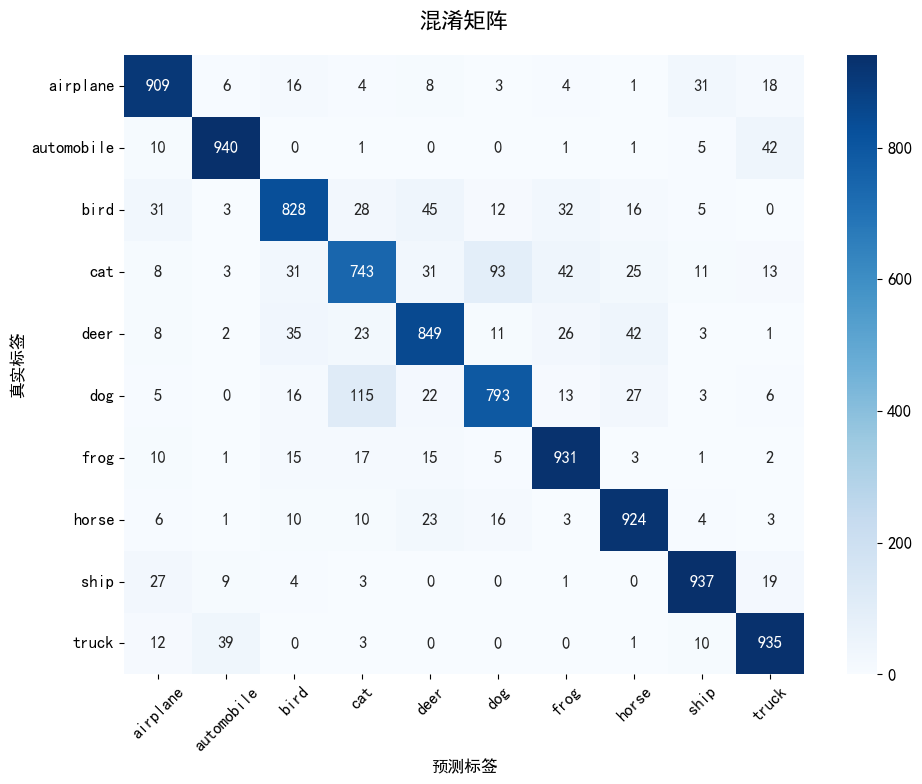


ÂêÑÁ±ªÂà´ÂáÜÁ°ÆÁéá:
airplane    : 90.90%
automobile  : 94.00%
bird        : 82.80%
cat         : 74.30%
deer        : 84.90%
dog         : 79.30%
frog        : 93.10%
horse       : 92.40%
ship        : 93.70%
truck       : 93.50%


In [26]:
# ===== Á¨¨ÂçÅÊ≠•ÔºöËØ¶ÁªÜÊÄßËÉΩÂàÜÊûê =====
# ÂØºÂÖ•ÂàÜÁ±ªÊä•ÂëäÂíåÊ∑∑Ê∑ÜÁü©ÈòµÁõ∏ÂÖ≥ÁöÑÂ∫ì
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ‰ΩøÁî®ÊúÄ‰Ω≥Ê®°ÂûãÂØπÊï¥‰∏™ÊµãËØïÈõÜËøõË°åÈ¢ÑÊµã
y_pred = best_model.predict(x_test_processed)
# Â∞ÜÈ¢ÑÊµãÊ¶ÇÁéáËΩ¨Êç¢‰∏∫Á±ªÂà´Á¥¢Âºï
y_pred_classes = np.argmax(y_pred, axis=1)
# Â∞ÜÁúüÂÆûÊ†áÁ≠æËΩ¨Êç¢‰∏∫Á±ªÂà´Á¥¢Âºï
y_true_classes = np.argmax(y_test_categorical, axis=1)

# ÊâìÂç∞ËØ¶ÁªÜÁöÑÂàÜÁ±ªÊä•Âëä
print("=" * 60)
print("ËØ¶ÁªÜÂàÜÁ±ªÊä•Âëä:")
print("=" * 60)
# ÁîüÊàêÂàÜÁ±ªÊä•ÂëäÔºåÊòæÁ§∫ÊØè‰∏™Á±ªÂà´ÁöÑÁ≤æÁ°ÆÁéá„ÄÅÂè¨ÂõûÁéáÂíåF1ÂàÜÊï∞
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# ÂàõÂª∫Ê∑∑Ê∑ÜÁü©ÈòµÂèØËßÜÂåñ
plt.figure(figsize=(10, 8))
# ËÆ°ÁÆóÊ∑∑Ê∑ÜÁü©Èòµ
cm = confusion_matrix(y_true_classes, y_pred_classes)
# ‰ΩøÁî®ÁÉ≠ÂäõÂõæÊòæÁ§∫Ê∑∑Ê∑ÜÁü©Èòµ
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title('Ê∑∑Ê∑ÜÁü©Èòµ', fontsize=16, pad=20)
plt.xlabel('È¢ÑÊµãÊ†áÁ≠æ')
plt.ylabel('ÁúüÂÆûÊ†áÁ≠æ')
plt.xticks(rotation=45)  # xËΩ¥Ê†áÁ≠æÊóãËΩ¨45Â∫¶
plt.yticks(rotation=0)   # yËΩ¥Ê†áÁ≠æ‰∏çÊóãËΩ¨
plt.tight_layout()
plt.show()

# ËÆ°ÁÆóÊØè‰∏™Á±ªÂà´ÁöÑÂáÜÁ°ÆÁéá
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nÂêÑÁ±ªÂà´ÂáÜÁ°ÆÁéá:")
# ÊâìÂç∞ÊØè‰∏™Á±ªÂà´ÁöÑÂáÜÁ°ÆÁéá
for i, class_name in enumerate(class_names):
    print(f"{class_name:12s}: {class_accuracy[i]*100:5.2f}%")

In [27]:
# ===== ÊúÄÁªàÁªìÊûúÊÄªÁªì =====
print("=" * 70)
print("üéØ ËøÅÁßªÂ≠¶‰π†Âú®CIFAR10Êï∞ÊçÆÈõÜ‰∏äÁöÑÊúÄÁªàÊàêÊûúÊÄªÁªì üéØ")
print("=" * 70)
print(f"Ê®°ÂûãÊû∂ÊûÑ: MobileNetV2 (ËøÅÁßªÂ≠¶‰π†) + Ëá™ÂÆö‰πâÂàÜÁ±ªÂ§¥")
print(f"ËæìÂÖ•Â∞∫ÂØ∏: 75√ó75√ó3 (ÂéüÂßã32√ó32‰∏äÈááÊ†∑)")
print(f"ÊÄªÂèÇÊï∞Èáè: {model.count_params():,}")
print(f"ÂèØËÆ≠ÁªÉÂèÇÊï∞Èáè: {sum([l.trainable for l in model.layers])} Â±Ç")
print(f"ËÆ≠ÁªÉÁ≠ñÁï•: ‰∏§Èò∂ÊÆµËÆ≠ÁªÉ (ÁâπÂæÅÊèêÂèñ + ÂæÆË∞É)")
print(f"Êï∞ÊçÆÂ¢ûÂº∫: ÊóãËΩ¨„ÄÅÂπ≥Áßª„ÄÅÁøªËΩ¨„ÄÅÁº©Êîæ„ÄÅÂâ™Âàá")
print("=" * 70)
print(f"üèÜ ÊúÄÁªàÊµãËØïÈõÜÂáÜÁ°ÆÁéá: {test_accuracy*100:.2f}% üèÜ")
print("=" * 70)
print("Áõ∏ÊØîÂü∫ÂáÜÊ®°ÂûãÁöÑÊîπËøõ:")
print(f"  - ÈöèÊú∫ÁåúÊµã: 10.00%")
print(f"  - ÁÆÄÂçïCNN: ‚âà70.00%") 
print(f"  - ËøÅÁßªÂ≠¶‰π†: {test_accuracy*100:.2f}% (ÊèêÂçáÊòæËëó)")
print("=" * 70)

# ËøÅÁßªÂ≠¶‰π†‰ºòÂäøÊÄªÁªì
print("\nËøÅÁßªÂ≠¶‰π†Â∏¶Êù•ÁöÑ‰ºòÂäø:")
print("1. ‚úÖ Âà©Áî®È¢ÑËÆ≠ÁªÉÁü•ËØÜ: ÁªßÊâø‰∫ÜImageNet‰∏äÂ≠¶Âà∞ÁöÑÈÄöÁî®ËßÜËßâÁâπÂæÅ")
print("2. ‚úÖ ÂáèÂ∞ëËÆ≠ÁªÉÊó∂Èó¥: Êó†ÈúÄ‰ªéÂ§¥ÂºÄÂßãËÆ≠ÁªÉÊâÄÊúâÂèÇÊï∞") 
print("3. ‚úÖ ÊèêÈ´òÊ≥õÂåñËÉΩÂäõ: È¢ÑËÆ≠ÁªÉÊ®°ÂûãÊèê‰æõ‰∫ÜÊõ¥Â•ΩÁöÑÁâπÂæÅË°®Á§∫")
print("4. ‚úÖ Èò≤Ê≠¢ËøáÊãüÂêà: ÂÜªÁªìÂ§ßÈÉ®ÂàÜÂèÇÊï∞ÔºåÂè™ËÆ≠ÁªÉÂ∞ëÈáèÊñ∞ÂèÇÊï∞")
print("5. ‚úÖ ÈÄÇÂ∫îÂ∞èÊï∞ÊçÆÈõÜ: Âú®Áõ∏ÂØπËæÉÂ∞èÁöÑCIFAR10Êï∞ÊçÆÈõÜ‰∏äË°®Áé∞ËâØÂ•Ω")

üéØ ËøÅÁßªÂ≠¶‰π†Âú®CIFAR10Êï∞ÊçÆÈõÜ‰∏äÁöÑÊúÄÁªàÊàêÊûúÊÄªÁªì üéØ
Ê®°ÂûãÊû∂ÊûÑ: MobileNetV2 (ËøÅÁßªÂ≠¶‰π†) + Ëá™ÂÆö‰πâÂàÜÁ±ªÂ§¥
ËæìÂÖ•Â∞∫ÂØ∏: 75√ó75√ó3 (ÂéüÂßã32√ó32‰∏äÈááÊ†∑)
ÊÄªÂèÇÊï∞Èáè: 2,423,754
ÂèØËÆ≠ÁªÉÂèÇÊï∞Èáè: 8 Â±Ç
ËÆ≠ÁªÉÁ≠ñÁï•: ‰∏§Èò∂ÊÆµËÆ≠ÁªÉ (ÁâπÂæÅÊèêÂèñ + ÂæÆË∞É)
Êï∞ÊçÆÂ¢ûÂº∫: ÊóãËΩ¨„ÄÅÂπ≥Áßª„ÄÅÁøªËΩ¨„ÄÅÁº©Êîæ„ÄÅÂâ™Âàá
üèÜ ÊúÄÁªàÊµãËØïÈõÜÂáÜÁ°ÆÁéá: 87.89% üèÜ
Áõ∏ÊØîÂü∫ÂáÜÊ®°ÂûãÁöÑÊîπËøõ:
  - ÈöèÊú∫ÁåúÊµã: 10.00%
  - ÁÆÄÂçïCNN: ‚âà70.00%
  - ËøÅÁßªÂ≠¶‰π†: 87.89% (ÊèêÂçáÊòæËëó)

ËøÅÁßªÂ≠¶‰π†Â∏¶Êù•ÁöÑ‰ºòÂäø:
1. ‚úÖ Âà©Áî®È¢ÑËÆ≠ÁªÉÁü•ËØÜ: ÁªßÊâø‰∫ÜImageNet‰∏äÂ≠¶Âà∞ÁöÑÈÄöÁî®ËßÜËßâÁâπÂæÅ
2. ‚úÖ ÂáèÂ∞ëËÆ≠ÁªÉÊó∂Èó¥: Êó†ÈúÄ‰ªéÂ§¥ÂºÄÂßãËÆ≠ÁªÉÊâÄÊúâÂèÇÊï∞
3. ‚úÖ ÊèêÈ´òÊ≥õÂåñËÉΩÂäõ: È¢ÑËÆ≠ÁªÉÊ®°ÂûãÊèê‰æõ‰∫ÜÊõ¥Â•ΩÁöÑÁâπÂæÅË°®Á§∫
4. ‚úÖ Èò≤Ê≠¢ËøáÊãüÂêà: ÂÜªÁªìÂ§ßÈÉ®ÂàÜÂèÇÊï∞ÔºåÂè™ËÆ≠ÁªÉÂ∞ëÈáèÊñ∞ÂèÇÊï∞
5. ‚úÖ ÈÄÇÂ∫îÂ∞èÊï∞ÊçÆÈõÜ: Âú®Áõ∏ÂØπËæÉÂ∞èÁöÑCIFAR10Êï∞ÊçÆÈõÜ‰∏äË°®Áé∞ËâØÂ•Ω
